# Objective
To help an Online Clothing Company to decide whether to focus their efforts on their mobile app experience or their website.

In [18]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 
%matplotlib inline

## Dataset

Here, we will work on the data of Ecommerece Customers provided by the Company. 

In [19]:
# Importing the dataset
import os
customers = pd.read_csv('../project/Dataset.csv')

In [20]:
# Checking out the dataset
customers.head(10)

,email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [21]:
# checking for null values in dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [22]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### for the rest of the operation we will work only on numerical data so we will drop object features like as email and Address

## Exploratory Data Analysis
For the data Visualization we will only use the numerical data of the csv file.

#### - Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

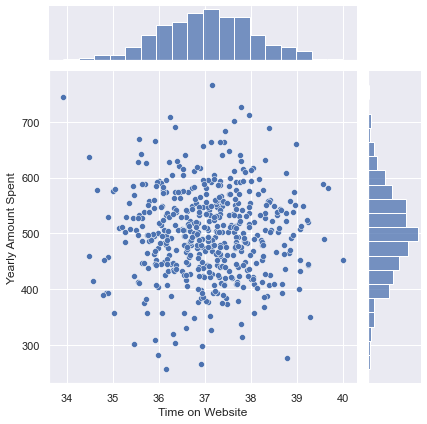

In [23]:
sns.jointplot(x='Time on Website', y ='Yearly Amount Spent', data=customers)

#### - Using seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns.

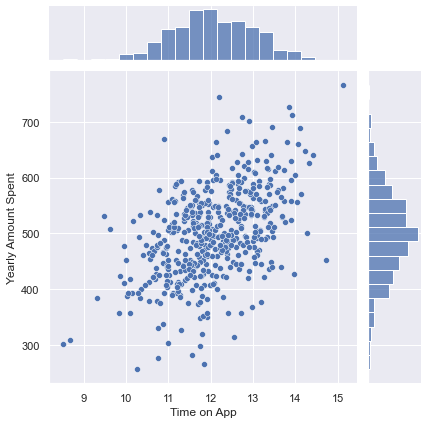

In [24]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

#### Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

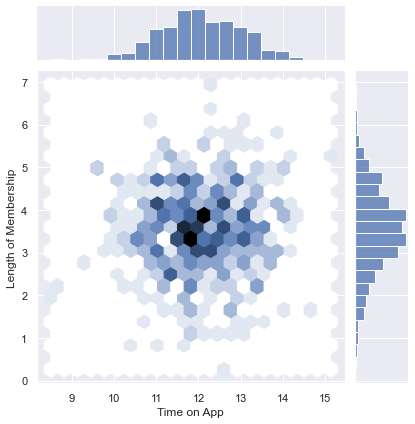

In [25]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

#### Exploring all types of relationships across the entire data set. Using pairplot to recreate the plot below.

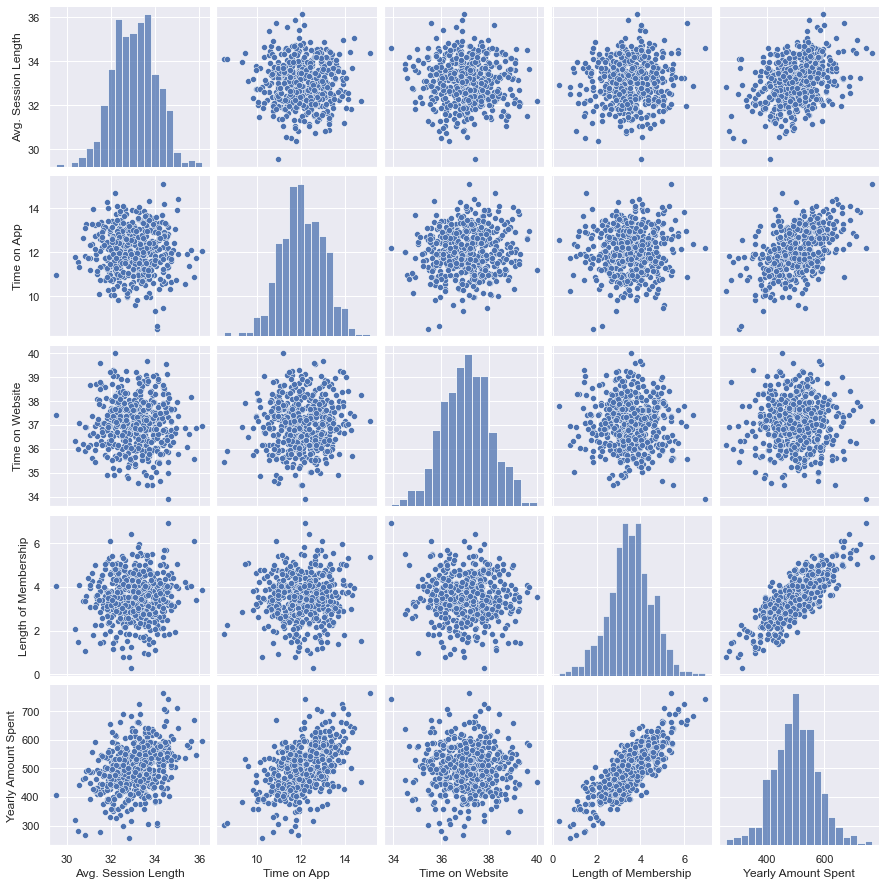

In [26]:
sns.pairplot(customers)

### Based on this plot it looks that the Length Of Membership is the most correlated feature with Yearly Amount Spent

#### Creating a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership

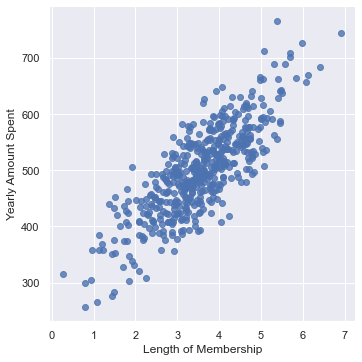

In [27]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers, fit_reg=False)

In [28]:
customers.head()

,email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Dropping object features like email and Address 

In [29]:
customers.drop('email', inplace=True, axis=1)
customers.drop('Address', inplace=True, axis=1)
customers.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Converting Dummy feature Avatar into numerical feature 

In [30]:
unique_values = customers.Avatar.unique()
print(unique_values) 
print('\n\nDistinct Types of Avatar : ', unique_values.shape)

['Violet' 'DarkGreen' 'Bisque' 'SaddleBrown' 'MediumAquaMarine'
 'FloralWhite' 'DarkSlateBlue' 'Aqua' 'Salmon' 'Brown' 'Tomato'
 'RoyalBlue' 'DarkBlue' 'Peru' 'PowderBlue' 'OliveDrab' 'Cyan'
 'LightSeaGreen' 'PeachPuff' 'Black' 'Olive' 'Silver' 'Wheat' 'Teal'
 'Linen' 'MediumSlateBlue' 'LemonChiffon' 'DarkOrchid' 'SeaGreen'
 'SteelBlue' 'DarkMagenta' 'DarkGoldenRod' 'DarkSeaGreen' 'Gainsboro'
 'HotPink' 'HoneyDew' 'WhiteSmoke' 'GhostWhite' 'Chocolate' 'Snow'
 'BurlyWood' 'Moccasin' 'BlueViolet' 'MediumBlue' 'GreenYellow'
 'SandyBrown' 'MediumVioletRed' 'DarkOliveGreen' 'DarkSalmon' 'DeepPink'
 'SkyBlue' 'Magenta' 'DarkTurquoise' 'SpringGreen' 'OrangeRed' 'LimeGreen'
 'LightGreen' 'LightYellow' 'MintCream' 'DimGray' 'Indigo' 'LightSalmon'
 'DeepSkyBlue' 'Turquoise' 'LightSteelBlue' 'Cornsilk' 'DarkKhaki'
 'FireBrick' 'SlateGray' 'Crimson' 'MidnightBlue' 'DarkCyan' 'OldLace'
 'Gray' 'LightPink' 'BlanchedAlmond' 'CadetBlue' 'PaleTurquoise'
 'Chartreuse' 'Khaki' 'MediumSpringGreen' 'Lime' 

#### After seeing at large number of distinct types of Avatars, it is better to drop this feature

In [31]:
customers.drop('Avatar', inplace=True, axis=1)
print("The Final Dataset")
customers.head()

The Final Dataset


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Splitting Dataset into Feature and Label

Let's set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [32]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

### Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [77]:
print(X_train.shape, X_test.shape)

(400, 4) (100, 4)


## Training the Model using Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [80]:
# Loading the training data in learning model
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
# minimized values of weights i.e coefficients of the model
print(lr.coef_)

[25.73519301 38.86277792  0.33421973 61.53175155]


## Making Predictions using test dataset

In [82]:
predictions = lr.predict(X_test)

####  Creating a scatterplot of the real test values versus the predicted values

Text(0.5, 0, 'Y test')

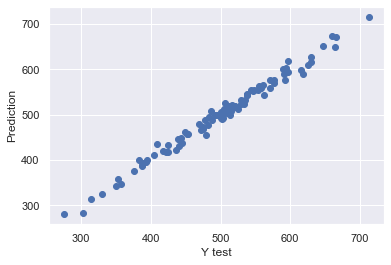

In [83]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Prediction')
plt.pyplot.xlabel('Y test')

## Model Evaluation

#### Let's Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. To evaluate our model. Using sklearn's metrics module.

In [86]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.656311722807463
MSE: 95.42787047197623
RMSE: 9.768718978042937


 #### Let's explore the residuals to make sure everything was okay with our data by Plotting a histogram of the residuals and to make sure it looks normally distributed

/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

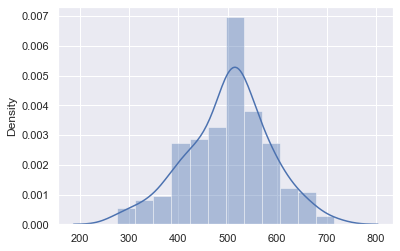

In [96]:
sns.distplot((y_test, predictions))

## Conclusion

We can decide whether to focus on mobile app or website by following data. 

In [97]:
pd.DataFrame(lr.coef_, X.columns, columns=['coefficients'])

,coefficients
Avg. Session Length,25.735193
Time on App,38.862778
Time on Website,0.334220
Length of Membership,61.531752


#### Based on the above analytics, we can clearly say that the company should focus more on their mobile app.